In [2]:
print("Lecture-16")

Lecture-16


## Lojistik Olmayan Regresyon Modeli İçin "Boston Housing Prices" Örneği

Veriseti: Boston'da 70'li yılların sonlarına doğru ev fiyatlarının tahmin edilmesi için toplanmış verilerden oluşmaktadır.

https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

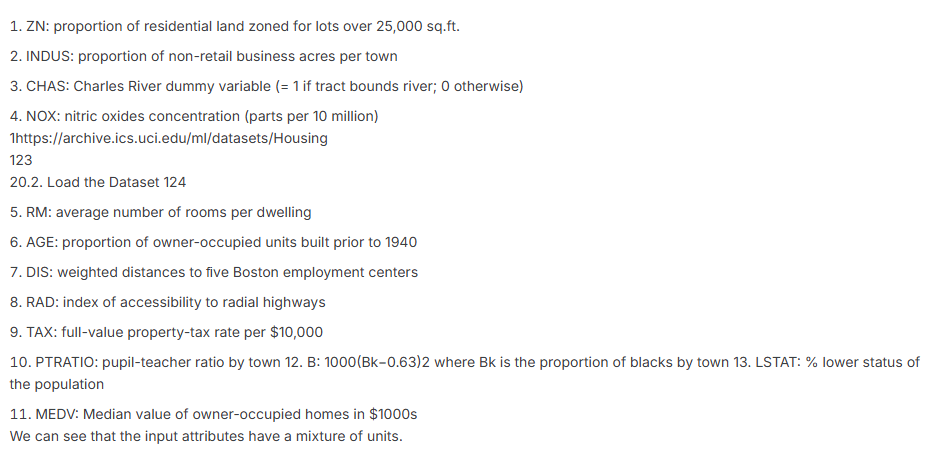

In [3]:
import pandas as pd

df = pd.read_csv('housing.csv', delimiter=r'\s+', header=None)

dataset_x = df.iloc[:, :-1].to_numpy(dtype='float32')
dataset_y = df.iloc[:, -1].to_numpy(dtype='float32')

from sklearn.model_selection import train_test_split

training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y, test_size=0.2)



In [4]:
from tensorflow.keras.datasets import boston_housing

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [7]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(training_dataset_x)
scaled_training_dataset_x = mms.transform(training_dataset_x)
scaled_test_dataset_x = mms.transform(test_dataset_x)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='Boston-Housing-Prices')
model.add(Dense(64, activation='relu', input_dim=training_dataset_x.shape[1], name='Hidden-1'))
model.add(Dense(64, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='linear', name='Output'))

model.summary()

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
hist = model.fit(scaled_training_dataset_x, training_dataset_y, batch_size=32, epochs=200, validation_split = 0.2)

Model: "Boston-Housing-Prices"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 64)                896       
                                                                 
 Hidden-2 (Dense)            (None, 64)                4160      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
11/11 [==============================] - 1s 30ms/step - loss: 533.5494 - mae: 21.1646 - val_loss: 561.6955 - val_mae: 21.7848
Epoch 2/200
11/11 [==============================] - 0s 6ms/step - loss: 468.7146 - mae: 19.4949 - val_loss: 494.4707 - val_mae: 20.1235
Epoch 3/200
11/11 [=============

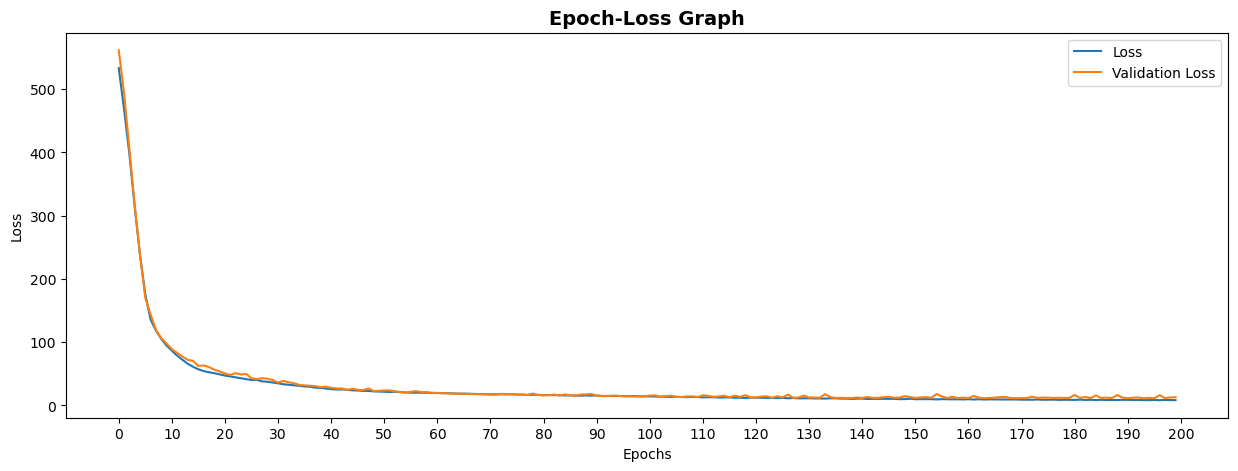

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.title('Epoch-Loss Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0, 210, 10))

plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

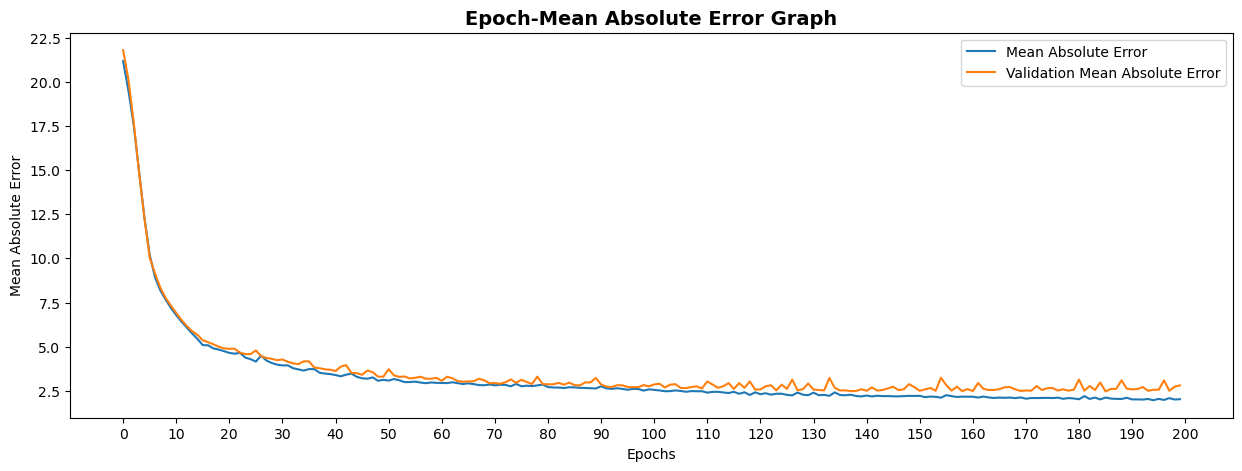

In [11]:
plt.figure(figsize=(15, 5))
plt.title('Epoch-Mean Absolute Error Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.xticks(range(0, 210, 10))

plt.plot(hist.epoch, hist.history['mae'])
plt.plot(hist.epoch, hist.history['val_mae'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

In [12]:
eval_result = model.evaluate(scaled_test_dataset_x, test_dataset_y)

for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]}: {eval_result[i]}')

4/4 [==============================] - 0s 3ms/step - loss: 29.8188 - mae: 3.3651
loss: 29.81880760192871
mae: 3.365095615386963


In [13]:
import numpy as np

predict_data = np.array([[0.11747, 12.50, 7.870, 0, 0.5240, 6.01, 83.10, 6.524, 5, 311.0, 15.20, 396.90, 13.27]])

scaled_predict_data = mms.transform(predict_data)
predict_result = model.predict(scaled_predict_data)

for val in predict_result[:, 0]:
    print(val)

1/1 [==============================] - 0s 353ms/step
21.036236


In [14]:
model.save('boston.h5')

In [15]:
import pickle

with open('boston.pickle', 'wb') as f:
    pickle.dump(mms, f)

## Yapay Sinir Ağlarında Çok Değişkenli (Multivariate) Regresyon Modelleri

Tek değişkenli model ile çok değişkenli model arasındaki tek fark yalnızca çok değişkenli modellerde çıktı katmanındaki nöronların sayısı bağımlı değişken sayısı kadar olmaktadır.
Lojistik regresyon modelleri için "çok değişkenli (multivariate)" terimi yerine "çok etiketli (multilabel)" terimi daha çok tercih edilmektedir.

### Yapay Sinir Ağlarında Lojistik Regresyon Modelleri

Etiket (label) --> Çıktıdaki değişken sayısı
sınıf (class)

1) Tek etiketli iki sınıflı lojistik regresyon modelleri (Tek Etiketli-İkili Lojistik Regresyon Mo.) -> diabetes.csv
2) Tek etiketli çok sınıflı lojistik regresyon modelleri -> kişinin eğtiim durumu -> ilkokul, ortaokul, lise, üniversite
 ilkokul + ortaokul + lise + üniversite  = 1
3) Çok etiketli çok sınıflı lojistik regresyon modelleri -> çeşitli biyomedikal tetkik değerlerinden hareketle hem kişinin şeker hastası olup olmadığını hem de kalp hastalıklarına yatkınlık derecesini tahmin etmek isteyebiliriz.

In [18]:
# A = 0.3, b = 0.2, c = 0.1, D = 0.35, E = 0.05
output = np.array([0.3, 0.2, 0.1, 0.35, 0.05])
output

array([0.3 , 0.2 , 0.1 , 0.35, 0.05])

In [19]:
np.sum(output)

1.0

In [20]:
np.max(output)

0.35

In [21]:
np.argmax(output)

3

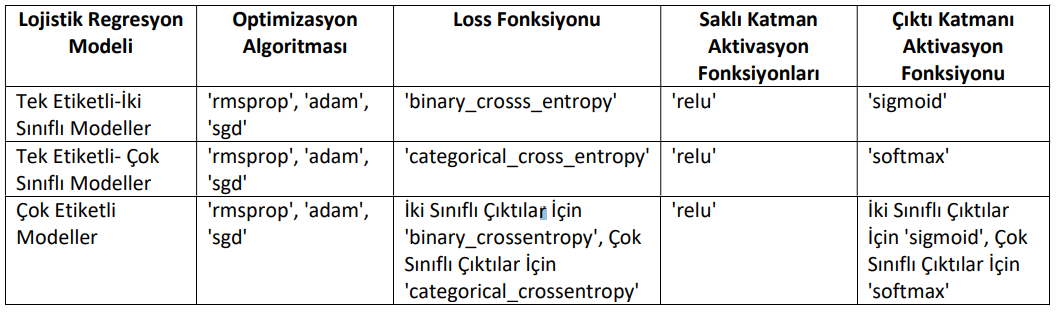

Peki birden fazla sınıfın içerisine girebilen sınıflandırma modelleri için ne yapılabilir? Örneğin bir müzik parçasının türünü sınıflandırmak isteyelim. Parçanın türü "pop", "rock", "slow", "rap", "new wave" gibi kategorilerin birden fazlasına sahip olabilsin. Bu nasıl bir sınıflandırma modelidir? Bu model aslında çok etiketli bir model olarak düşünülebilir. 6 etiket vardır. Bu 6 etiket "var", "yok" biçiminde iki sınıf içermektedir. O halde bu model için 6 çıktıya sahip olan bir ağ oluşturulabilir. Sigmoid aktivasyon fonksiyonuna sahip olabilir. 

Diğer bir seçenek de problemi tek etiketli çok sıınlfı olarak modellemektedir. Bu durumda yine 6 nöron bulunuur fakat çıktı katmanının aktivasyon fonksiyonu "softmax" alınır. Böylece en yüksek oranlı çıktıları veren birden fazla sınıf alınabilir. 

Veri bilimcileri bu tür durumlarda çok etiketli iki sınıflı model oluşturmayı tercih etmektedir.

## Yazılardan Duygu veya Kanılara İlişkin Sonuçların Çıkartılması - IMDB Örneği

Yorumları yapan kişilerin öznel duyguları ve kanıları hakkında analizler yapmak isteyebiliriz. "duygusal/kanısal analiz (sentiment analysis)". 

IMDB veri kümesi filmler hakkındaki yorumlardan oluşmaktadır. Her yorum "olumlu (positive)" ya da "olumsuz (negative)" biçimde değerlendirilmektedir. Biz burada içeriğe bakarak bir yorumun olumlu mu yoksa olumsuz mu olduğunu tahmin eedcek bir model üzerinde çalışacağız. 

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


Böyle bir duygusal/kanısal analizi nasıl yapabiliriz? Öncelikle yorum yazılarını bir biçimde sayısallaştıramamız gerekir. Çünkü ysa girdi olarak yazıları değil ancak sayıları verebiliriz. Peki bu örnekte yorum yazılarını nasıl sayısallaştırabiliriz? 